<a href="https://colab.research.google.com/github/apoorvsingh090/NIFTY-ARIMA/blob/main/TIMESERIES_NIFTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/kaggle/Intraday 1 Min Data.zip" "data.zip"

In [3]:
!unzip "data.zip"

Archive:  data.zip
   creating: Intraday 1 Min Data/2012/
  inflating: Intraday 1 Min Data/2012/2012 DEC BNF.txt  
  inflating: Intraday 1 Min Data/2012/2012 DEC NIFTY.txt  
  inflating: Intraday 1 Min Data/2012/2012 NOV BNF.txt  
  inflating: Intraday 1 Min Data/2012/2012 NOV NIFTY.txt  
   creating: Intraday 1 Min Data/2012/BANKNIFTY 2012 JAN TO OCT/
  inflating: Intraday 1 Min Data/2012/BANKNIFTY 2012 JAN TO OCT/2012 JAN TO OCT BANKNIFTY.txt  
   creating: Intraday 1 Min Data/2012/NIFTY 2012 JAN TO OCT/
  inflating: Intraday 1 Min Data/2012/NIFTY 2012 JAN TO OCT/2012 JAN TO OCT NIFTY.txt  
   creating: Intraday 1 Min Data/2013/
  inflating: Intraday 1 Min Data/2013/2013 APRIL BNF.txt  
  inflating: Intraday 1 Min Data/2013/2013 APRIL NIFTY.txt  
  inflating: Intraday 1 Min Data/2013/2013 AUG BNF.txt  
  inflating: Intraday 1 Min Data/2013/2013 AUG NIFTY.txt  
  inflating: Intraday 1 Min Data/2013/2013 DEC BNF.txt  
  inflating: Intraday 1 Min Data/2013/2013 DEC NIFTY.txt  
  inflati

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Intraday 1 Min Data/2021/2021 JAN NIFTY.txt',header=None)
df.drop(labels=[0,7,8],axis=1,inplace=True)
df.columns=['date','time','open','high','low','close']

In [6]:
df.head()

,date,time,open,high,low,close
0,20210101,09:08,13996.10,13996.10,13996.10,13996.10
1,20210101,09:16,13997.90,14020.85,13991.35,14013.15
2,20210101,09:17,14014.85,14018.55,14008.15,14009.05
3,20210101,09:18,14008.05,14013.10,14005.05,14012.70
4,20210101,09:19,14013.65,14019.10,14013.65,14016.20


In [7]:
df["day"]=df.date%5
df["month"]=((df.date/100)%100).astype(int)
df["year"]=(df.date/10000).astype(int)

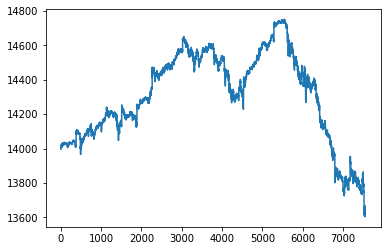

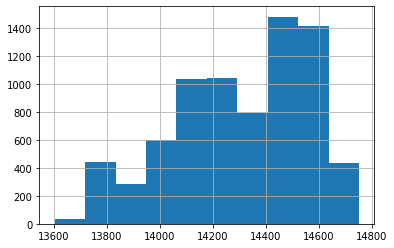

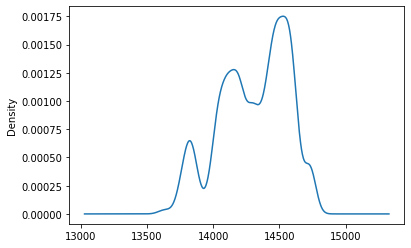

In [8]:
df['close'].plot()
plt.show()
df['close'].hist()
plt.show()
df['close'].plot(kind='kde')
plt.show()

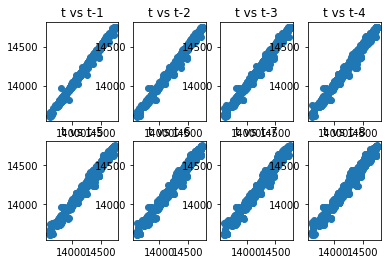

In [9]:
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
lags=8

columns = [df['close']]
for i in range(1,(lags + 1)):
  columns.append(df['close'].shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
  ax = plt.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()


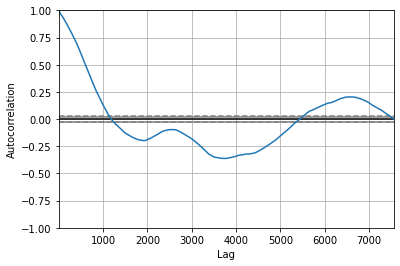

In [10]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['close'])


BOXCOX Transformation-NOT USED

Lambda: 12.611274


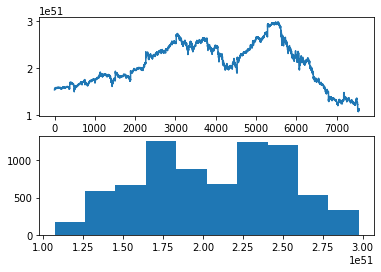

(array([  32.,  445.,  288.,  597., 1038., 1039.,  789., 1480., 1415.,
         434.]),
 array([13602.8 , 13717.71, 13832.62, 13947.53, 14062.44, 14177.35,
        14292.26, 14407.17, 14522.08, 14636.99, 14751.9 ]),
 <a list of 10 Patch objects>)

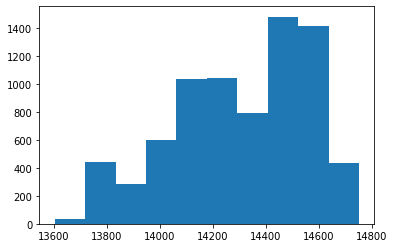

In [11]:
from scipy.stats import boxcox 
from scipy.special import inv_boxcox
df['closemod'], lam = boxcox(df['close'])
print('Lambda: %f' % lam)
plt.subplot(211)
plt.plot(df['closemod'])
plt.subplot(212)
plt.hist(df['closemod'])
plt.show()
plt.hist(inv_boxcox(df['closemod'],lam))

Rolling mean


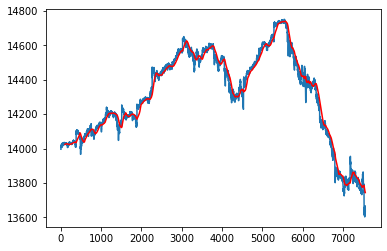

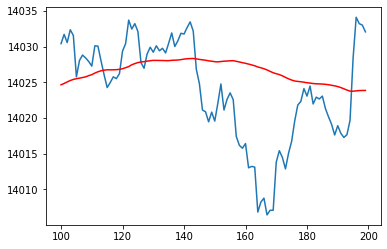

In [12]:
rolling = df['close'].rolling(window=100)
rolling_mean = rolling.mean()
# plot original and transformed dataset
df['close'].plot()
rolling_mean.plot(color='red')
plt.show()
df['close'][100:200].plot()
rolling_mean[100:200].plot(color='red')
plt.show()


Moving Average Prediction


Streaming output truncated to the last 5000 lines.
predicted=14443.450000, epected=14439.350000
predicted=14441.850000, epected=14452.950000
predicted=14443.500000, epected=14460.200000
predicted=14450.850000, epected=14465.950000
predicted=14459.700000, epected=14459.700000
predicted=14461.950000, epected=14464.300000
predicted=14463.300000, epected=14464.900000
predicted=14462.950000, epected=14460.500000
predicted=14463.250000, epected=14461.700000
predicted=14462.350000, epected=14461.200000
predicted=14461.150000, epected=14460.150000
predicted=14461.000000, epected=14461.050000
predicted=14460.800000, epected=14461.100000
predicted=14460.750000, epected=14462.500000
predicted=14461.550000, epected=14461.350000
predicted=14461.650000, epected=14459.100000
predicted=14461.000000, epected=14452.100000
predicted=14457.500000, epected=14455.500000
predicted=14455.550000, epected=14456.300000
predicted=14454.650000, epected=14448.950000
predicted=14453.600000, epected=14454.950000
pred

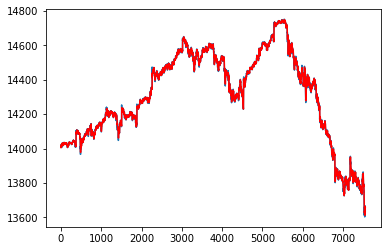

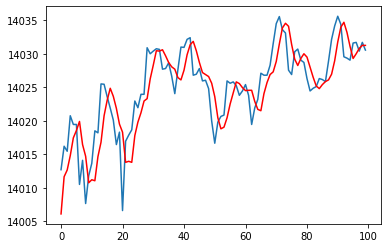

In [13]:
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
window = 3
history = [df['close'][i] for i in range(window)]
test = [df['close'][i] for i in range(window, len(df['close']))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
  length = len(history)
  yhat = mean([history[i] for i in range(length-window,length)])
  yhat=round(yhat / 0.05)*0.05
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, epected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()


Stationarity Test

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: 0.014837
p-value: 0.959742
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


We see that the series is clearly non stationary.Differencing to make it stationary

ADF Statistic: -27.729454
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


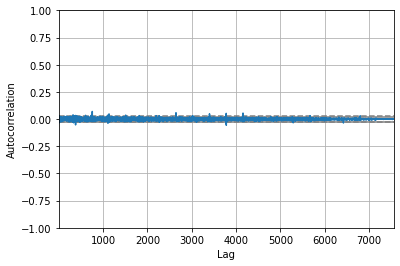

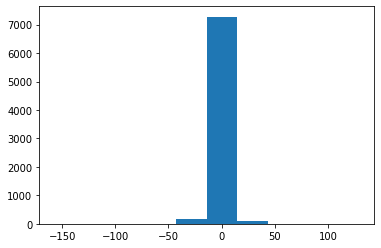

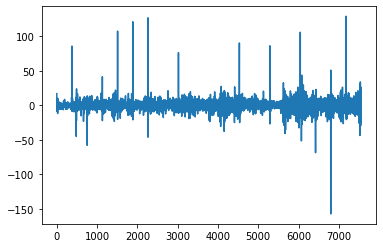

In [15]:
diff = list()

for i in range(1, len(df['close'])):
  value = df['close'][i] - df['close'][i - 1]
  diff.append(value)
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
autocorrelation_plot(diff)
plt.show()
plt.hist(diff)
plt.show()
plt.plot(diff)

Baseline Model-Persistence Algorithm


Persistence RMSE: 9.145


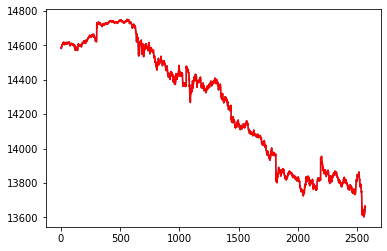

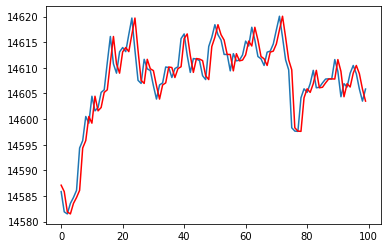

In [16]:
train_size = int(len(df['close']) * 0.66)
train = df['close'][0:train_size].values
test = df['close'][train_size:].values
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
  yhat = history
  yhat=round(yhat / 0.05)*0.05
  predictions.append(yhat)
  history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

Seasonal decomposition-Not used


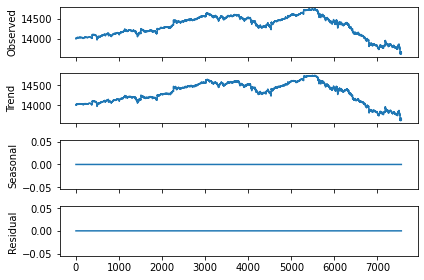

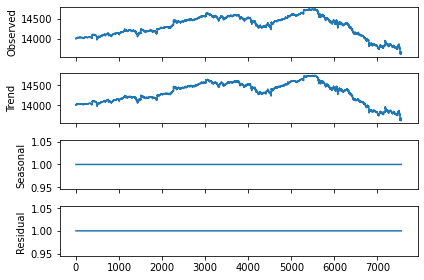

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['close'], model='additive', freq=1)
result.plot()
plt.show()
result = seasonal_decompose(df['close'], model='multiplicative', freq=1)
result.plot()
plt.show()


BASELINE MODEL-Persistence Algorithm

Persistence RMSE: 9.145


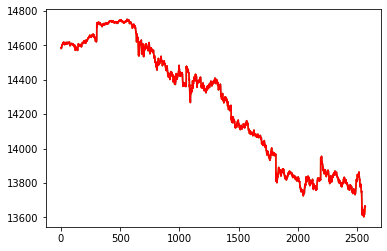

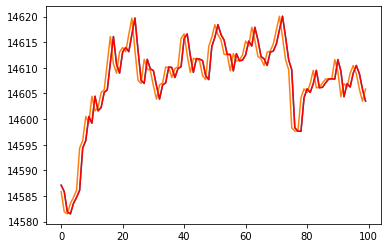

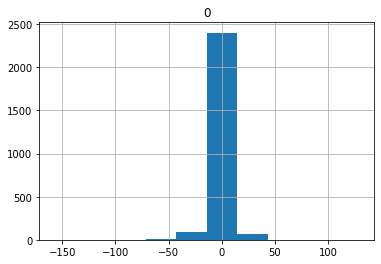

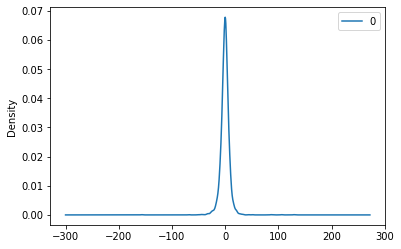

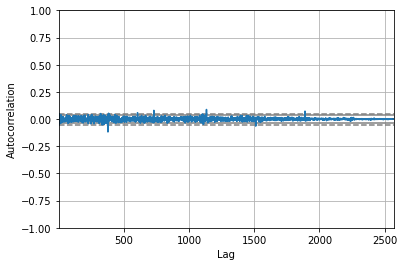

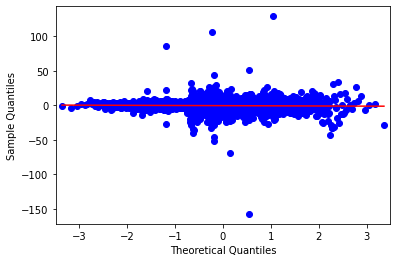

In [18]:
from pandas import DataFrame
from pandas import concat
from statsmodels.graphics.gofplots import qqplot
values = DataFrame(df['close'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Persistence RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()
autocorrelation_plot(residuals)
plt.show()
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()


AR Model

predicted=14587.150000, expected=14585.850000
predicted=14586.100000, expected=14581.900000
predicted=14582.050000, expected=14581.500000
predicted=14581.400000, expected=14583.550000
predicted=14583.450000, expected=14584.700000
predicted=14584.450000, expected=14586.100000
predicted=14586.100000, expected=14594.350000
predicted=14593.550000, expected=14595.800000
predicted=14595.700000, expected=14600.500000
predicted=14600.500000, expected=14599.200000
predicted=14598.700000, expected=14604.450000
predicted=14604.400000, expected=14601.600000
predicted=14601.550000, expected=14602.250000
predicted=14602.250000, expected=14605.200000
predicted=14604.650000, expected=14605.700000
predicted=14605.800000, expected=14611.000000
predicted=14610.550000, expected=14616.100000
predicted=14615.650000, expected=14610.750000
predicted=14610.350000, expected=14608.950000
predicted=14608.700000, expected=14613.100000
predicted=14612.500000, expected=14613.950000
predicted=14613.600000, expected=1

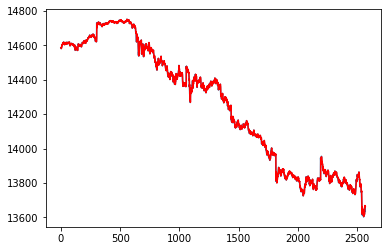

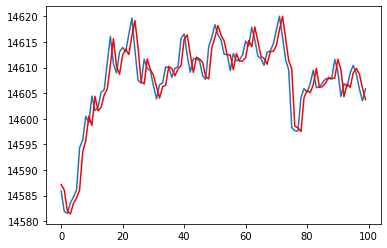

In [19]:
from statsmodels.tsa.ar_model import AR
X = df['close'].values
train, test = X[1:int(len(X)*0.66)], X[int(len(X)*0.66):]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
  length = len(history)
  lag = [history[i] for i in range(length-window,length)]
  yhat = coef[0]
  for d in range(window):
    yhat += coef[d+1] * lag[window-d-1]
    yhat = round(yhat / 0.05)*0.05
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

MA Model

predicted=14587.350000, expected=14585.850000
predicted=14586.200000, expected=14581.900000
predicted=14582.150000, expected=14581.500000
predicted=14581.400000, expected=14583.550000
predicted=14583.450000, expected=14584.700000
predicted=14584.650000, expected=14586.100000
predicted=14586.300000, expected=14594.350000
predicted=14593.750000, expected=14595.800000
predicted=14595.900000, expected=14600.500000
predicted=14600.600000, expected=14599.200000
predicted=14598.900000, expected=14604.450000
predicted=14604.550000, expected=14601.600000
predicted=14601.750000, expected=14602.250000
predicted=14602.450000, expected=14605.200000
predicted=14604.750000, expected=14605.700000
predicted=14605.900000, expected=14611.000000
predicted=14610.600000, expected=14616.100000
predicted=14615.950000, expected=14610.750000
predicted=14610.550000, expected=14608.950000
predicted=14608.900000, expected=14613.100000
predicted=14612.800000, expected=14613.950000
predicted=14613.800000, expected=1

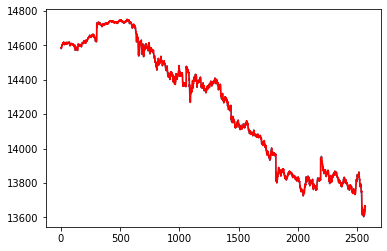

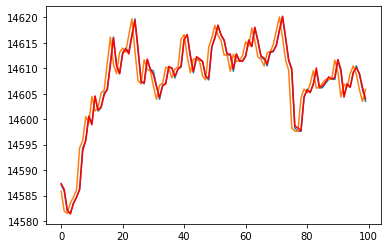

In [20]:
values = DataFrame(df['close'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
  # persistence
  yhat = test_X[t]
  error = test_y[t] - yhat
  # predict error
  length = len(history)
  lag = [history[i] for i in range(length-window,length)]
  pred_error = coef[0]
  for d in range(window):
    pred_error += coef[d+1] * lag[window-d-1]
  # correct the prediction
  yhat = yhat + pred_error
  yhat = round(yhat / 0.05)*0.05
  predictions.append(yhat)
  history.append(error)
  print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()

ACF & PACF plots

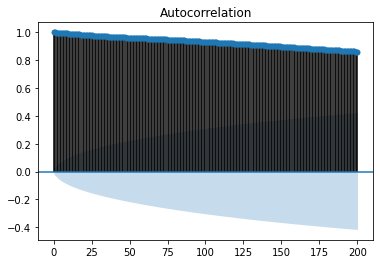

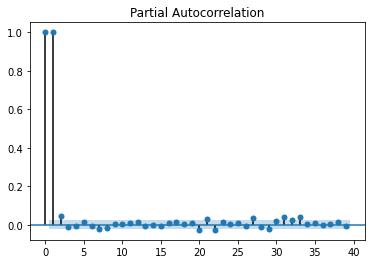

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['close'],lags=200)
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['close'])
plt.show()


ARIMA

predicted=13967.000000, expected=13810.400000, 95 confidence interval=13953.800000 to 13981.050000
predicted=13810.800000, expected=13861.400000, 95 confidence interval=13797.100000 to 13825.350000
predicted=13859.850000, expected=13849.200000, 95 confidence interval=13846.100000 to 13874.450000
predicted=13849.450000, expected=13839.050000, 95 confidence interval=13835.700000 to 13864.050000
predicted=13842.600000, expected=13836.000000, 95 confidence interval=13828.850000 to 13857.200000
predicted=13834.600000, expected=13834.250000, 95 confidence interval=13820.850000 to 13849.200000
predicted=13837.400000, expected=13812.550000, 95 confidence interval=13823.650000 to 13852.000000
predicted=13815.700000, expected=13811.550000, 95 confidence interval=13801.900000 to 13830.300000
predicted=13810.850000, expected=13801.700000, 95 confidence interval=13797.100000 to 13825.500000
predicted=13799.150000, expected=13809.900000, 95 confidence interval=13785.400000 to 13813.750000
predicted=

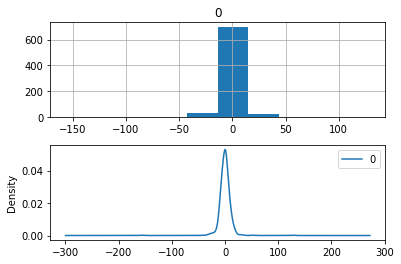

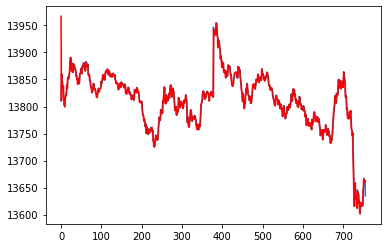

In [24]:
from statsmodels.tsa.arima_model import ARIMA
X = df['close'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
i=0
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(4,1,2))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat=output[0]-0.42
  yhat = np.round(yhat / 0.05) * 0.05
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f, 95 confidence interval=%f to %f' % (yhat, obs, np.round(output[2][0][0] / 0.05) * 0.05, np.round(output[2][0][1] / 0.05) * 0.05))
  if(np.round(output[2][0][0] / 0.05)*0.05>obs or round(output[2][0][1] / 0.05)*0.05<obs):
    i=i+1
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print(100*i/len(test))
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


HYPERTUNING ARIMA-GRID SEARCH

In [ ]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
  train_size = int(len(X) * 0.9)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out-of-sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse


In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# evaluate parameters
p_values = [4, 6, 8, 10]
d_values = [1]
q_values = [1]
evaluate_models(df['close'].values, p_values, d_values, q_values)
